# Úkol č. 1 - redukce dimenzionality a binární klasifikace

  * **Deadline je do 8. 5. 2023, 23:59:59**, pokud odevzdáte úkol do 14. 5. 2023, 23:59:59, budete penalizování -12 body, pozdější odevzdání je bez bodu.
  * V rámci tohoto úkolu se musíte vypořádat s vysokou dimenzí problému a poté úspěšně aplikovat vhodný klasfikační model.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budou strhávány body.

## Zdroj dat

 * Zdrojem dat jsou soubory `train.csv` a `evaluate.csv`.
 * Jedná se o obrázky 28x28 pixelů ve stupních šedi, které byly získány z [Fashion Mnist datasetu](https://www.kaggle.com/datasets/zalando-research/fashionmnist).
 * Soubor `train.csv` obsahuje trénovací data.
 * Cílová (vysvětlovaná) proměnná se jmenuje **label**.
 * Soubor `evaluate.csv` obsahuje testovací data bez hodnot skutečných labelů.

## Pokyny k vypracování

**Body zadání**, za jejichž (poctivé) vypracování získáte **25 bodů**:
  * V notebooku načtěte data ze souboru `train.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování, porovnávání modelů a následnou predikci výkonnosti finálního modelu.
  * Proveďte základní průzkum dat a svá pozorování diskutujte. Některé obrázky také zobrazte.
  * Postupně aplikujte modely **SVM**, **naivní Bayesův klasifikátor** a **LDA**, přičemž pro každý z nich:
      * Okomentujte vhodnost daného modelu pro daný typ úlohy.
      * Vyberte si hlavní hyperparametry k ladění (pokud model má hyperparametry) a najděte jejich nejlepší hodnoty.
      * Experimentujte se standardizací/normalizací dat.
      * U SVM vyzkoušejte alespoň dvě různé jádrové funkce.
      * Získané výsledky vždy řádně okomentujte.


  * Postupně aplikujte metody redukce dimenzionality PCA a LLE, přičemž pro každou z nich: 
      * Zopakujte předchozí kroky a pokuste modely vylepšit
      * Zkoumejte jaká dimenze je z hlediska výkonnosti finálního modelu nejlepší.
      * Získané výsledky vždy řádně okomentujte.
    
  * Ze všech zkoušených možností vyberte finální model a odhadněte, jakou přesnost můžete očekávat na nových datech, která jste doposud neměli k dispozici.
  
  * Nakonec načtěte vyhodnocovací data ze souboru `evaluate.csv`. Pomocí finálního modelu napočítejte predikce pro tyto data (vysvětlovaná proměnná v nich již není). Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte do dvou sloupců: **ID**, **predikce labelu**. Tento soubor též odevzdejte (uložte do projektu vedle notebooku).
   
   * Ukázka prvních řádků souboru `results.csv`:
  
```
ID,label
0,0
1,1
...
```

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML2/homeworks/index.html.
  * Vytvořte i csv soubor `results.csv` s predikcemi a uložte ho v rámci projektu vedle ipython notebooku.

# Řešení

## Příprava dat

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 14.4 MB


In [3]:
print(f'Number of NaN is {data.isna().sum().sum()}')
data.describe()

Number of NaN is 0


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,...,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000
mean,0.500417,0.000417,0.002917,0.066667,0.144583,0.216667,0.462917,1.605833,4.184167,10.954167,...,78.508750,49.705417,34.747083,14.742500,3.866667,1.334167,0.341250,0.141250,0.036250,0.006667
std,0.500104,0.020412,0.053939,0.688539,2.762431,2.343682,4.989054,12.574764,21.183025,33.693930,...,66.539823,62.185924,56.259061,37.883132,18.662614,10.515159,4.338699,3.205685,0.930661,0.287211
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,74.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,129.000000,92.250000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,30.000000,132.000000,85.000000,172.000000,189.000000,255.000000,227.000000,...,248.000000,247.000000,241.000000,244.000000,215.000000,184.000000,116.000000,106.000000,31.000000,14.000000


Na první pohled vskutku vidíme klasický grayscale formát obrázku, každý pixel má hodnotu od 0 do 255. Zároveň se jedná o velmi kvalitní dataset, neboť neobsahuje žádné NaN hodnoty. Po nastudování zdroje zároveň víme, že pixely odpovídají postupně pixelům v obrázcích 28x28.

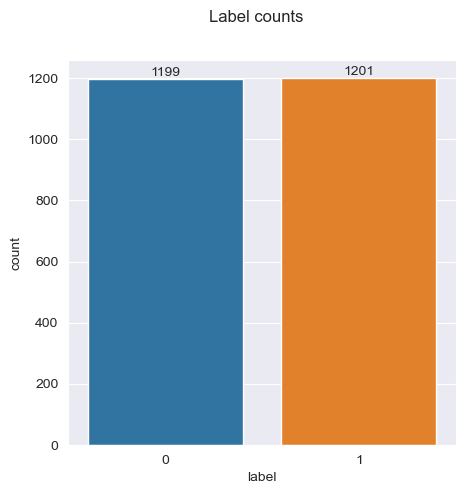

In [4]:
sns.set_style("darkgrid")
palette = sns.color_palette("hls", 10)
 
fig, ax = plt.subplots(figsize=(5,5))
fig.suptitle('Label counts')

sns.countplot(x='label', data=data, ax = ax)
ax.bar_label(ax.containers[0])
plt.show()

Zde vidíme, že labely jsou rovnoměrně rozložené.

Rozdělíme si data na trénovací, validační a testovací.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
random_seed = 7

Xtrain, Xrest, ytrain, yrest = train_test_split(
    data.drop(columns=['label']), data['label'], test_size=0.4, random_state=random_seed)

Xval, Xtest, yval, ytest = train_test_split(Xrest, yrest, test_size=0.5, random_state=random_seed) 


scaler = StandardScaler().fit(Xtrain)
Xtrain_stanscaled = pd.DataFrame(scaler.transform(Xtrain), columns=Xtrain.columns)
Xval_stanscaled = pd.DataFrame(scaler.transform(Xval), columns=Xval.columns)
Xtest_stanscaled = pd.DataFrame(scaler.transform(Xtest), columns=Xtest.columns)


min_scaler = MinMaxScaler().fit(Xtrain)
Xtrain_minscaled = pd.DataFrame(min_scaler.transform(Xtrain), columns=Xtrain.columns)
Xval_minscaled = pd.DataFrame(min_scaler.transform(Xval), columns=Xval.columns)
Xtest_minscaled = pd.DataFrame(min_scaler.transform(Xtest), columns=Xtest.columns)


Nyní si nějaké obrázky zobrazíme.

/var/folders/tl/h1jkjn_97773_b51y3fb7cfw0000gn/T/ipykernel_16302/2419224901.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(im, cax=cbar_ax)


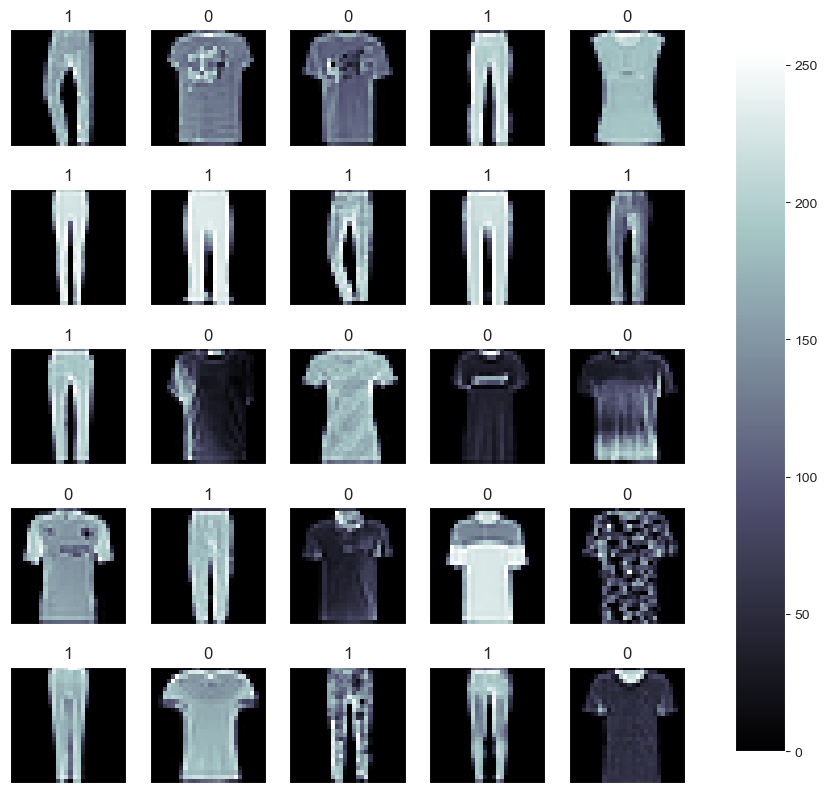

In [6]:

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10,10))
for i, ax in enumerate(axes.flat):
    im = ax.imshow(Xtrain.iloc[i].to_numpy().reshape(28,28), cmap='bone')
    ax.set_title(ytrain.iloc[i])
    ax.set_xticks([])
    ax.set_yticks([])

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.show()

Ihned vidíme, že je náš dataset rozdělen tak, že label 0 je tričko, zatímco label 1 jsou kalhoty. Zároveň víme, že se jedná vskutku o obrázky 28x28 px, jelikož vypadají dobře.

## Trénování modelů

### Support vector machines (SVM)

In [7]:
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV

def tune_SVC(Xtrain, ytrain, probability=False):
    param_grid = {'C': [0.01, 0.1, 1], 'gamma': [0.01, 0.1, 1 ],'kernel': ['rbf', 'linear']}
    grid = GridSearchCV(SVC(probability=probability),param_grid, refit=True, verbose=1, cv=4)
    grid.fit(Xtrain,ytrain)
    return grid.best_estimator_

def showCM(actual, predicted, title):
    con_matrix = pd.crosstab(pd.Series(yval.values.flatten(), name='Actual' ),pd.Series(predicted, name='Predicted'))
    plt.figure(figsize = (9,6))
    plt.title(title)
    sns.heatmap(con_matrix, cmap='Blues', annot=True, fmt='g')
    plt.show()

Zkusíme nejdříve model podpůrných vektorů SVM. Vzhledem k vysoké výpočetní náročnosti poladíme pouze hrstku parametrů. Využijeme k tomu `GridSearchCV`. Můžeme předpokládat, že SVM by mohl být pro daný problém dobrým modelem, neboť všechny kalhoty velmi často mívají v prostřední pixelech hodnotu 0, představující díru mezi nohavicemi a model by mohl vytvořit separující pás právě podle nich.

Fitting 4 folds for each of 18 candidates, totalling 72 fits

----------------------------------------------------------------------------------------------------
Best model is SVC(C=0.01, gamma=0.01, kernel='linear')
Accuracy score (train): 1.000000
Accuracy score (val): 0.979167


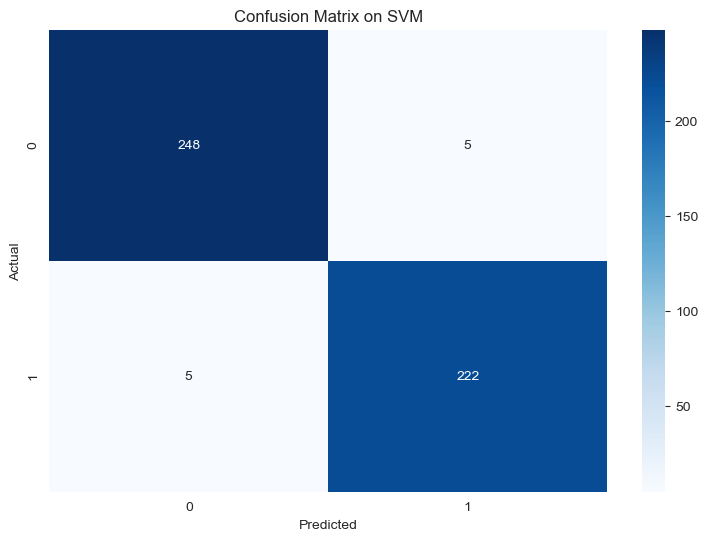

In [8]:
best_SVC = tune_SVC(Xtrain, ytrain)

print('\n' + 100*'-')
print(f'Best model is {best_SVC}')
print('Accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, best_SVC.predict(Xtrain))))
print('Accuracy score (val): {0:.6f}'.format(metrics.accuracy_score(yval, best_SVC.predict(Xval))))


showCM(yval,best_SVC.predict(Xval), 'Confusion Matrix on SVM')

Zde vidíme, že model má na validačních datech velmi dobrou přesnost. Dokonce 100% na trénovací množině, což by mohlo znamenat, že jsou data lineárně separabilní. 
Z matice záměn zároveň vidíme, že není žádný výrazný rozdíl záměnách jednotlivých skupin.

Mohlo by zajímavé se podívat na obrázky, které jsou nejblíže rozhodovací hranici (popř. na hranici pásu). Tedy vybereme ty, které v absolutní hodnotě mají největší alpha.

/var/folders/tl/h1jkjn_97773_b51y3fb7cfw0000gn/T/ipykernel_16302/2732005079.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(im, cax=cbar_ax)


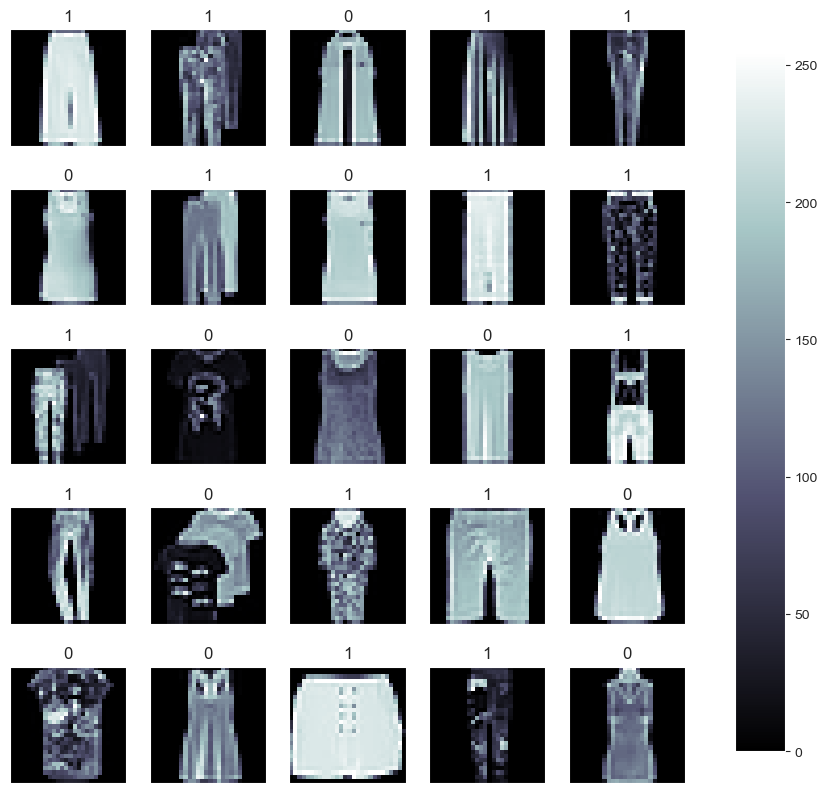

In [9]:
highest_alphas = best_SVC.support_.reshape(-1,1)[np.argsort(-np.abs(best_SVC.dual_coef_))].flatten()


fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10,10))
for i, ax in enumerate(axes.flat):
    im = ax.imshow(Xtrain.iloc[highest_alphas[i]].to_numpy().reshape(28,28), cmap='bone')
    ax.set_title(ytrain.iloc[highest_alphas[i]])
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.show()


Můžeme vidět velmi zajímavé výsledky. Všechny obrázky jsou velmi kostrbaté a i pro lidské oko jsou poměrně komplikované. Tedy je pozoruhodné, že model zvládl sestavit hranici, aby i tyto obrázky správně klasifikoval.

Zkusme nyní se podívat na přesnost v případě standardizovaných a a normalizovaných dat.

Fitting 4 folds for each of 18 candidates, totalling 72 fits

----------------------------------------------------------------------------------------------------
Best model is SVC(C=0.01, gamma=0.01, kernel='linear')
Accuracy score (train): 0.998611
Accuracy score (val): 0.977083


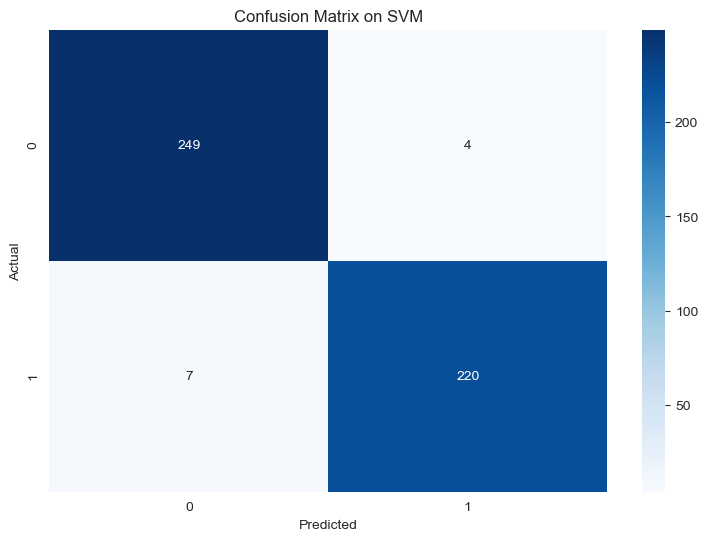

In [10]:
best_SVC_scaled = tune_SVC(Xtrain_minscaled, ytrain)

print('\n' + 100*'-')
print(f'Best model is {best_SVC}')
print('Accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, best_SVC_scaled.predict(Xtrain_minscaled))))
print('Accuracy score (val): {0:.6f}'.format(metrics.accuracy_score(yval, best_SVC_scaled.predict(Xval_minscaled))))

showCM(yval,best_SVC_scaled.predict(Xval_minscaled), 'Confusion Matrix on SVM')

Fitting 4 folds for each of 18 candidates, totalling 72 fits

----------------------------------------------------------------------------------------------------
Best model is SVC(C=0.01, gamma=0.01, kernel='linear')
Accuracy score (train): 0.998611
Accuracy score (val): 0.983333


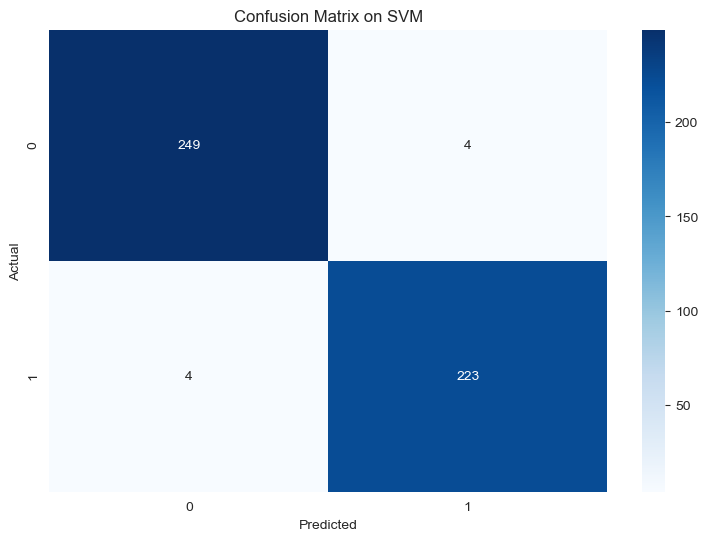

In [11]:
best_SVC_std = tune_SVC(Xtrain_stanscaled, ytrain)

print('\n' + 100*'-')
print(f'Best model is {best_SVC}')
print('Accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, best_SVC_std.predict(Xtrain_stanscaled))))
print('Accuracy score (val): {0:.6f}'.format(metrics.accuracy_score(yval, best_SVC_std.predict(Xval_stanscaled))))

showCM(yval,best_SVC_std.predict(Xval_stanscaled), 'Confusion Matrix on SVM')

Všechny příznaky jsou pixely se stejnou škálou, tedy podle očekávání se model příliš nezměnil z hlediska výkonnosti.

### Naivní Bayesův klasifikátor

Předpokládáme, že Naivní Bayes nebude ideálním modelem pro náš problém. jednotlivé příznaky určitě nebudou z povahy problému nezávislé. Navíc se jedná o spojité příznaky, tedy model navíc předpokládá, že podmíněná rozdělení budou Gaussovská.
Normalitu daných rozdělení můžeme dokonce otestovat např. Shapirovým testem.

In [12]:
import numpy as np
from scipy import stats

normal_tops = 0
normal_trousers = 0

for col in Xtrain.columns:
    tops = Xtrain[ytrain==0][col]
    shapiro_test = stats.shapiro(tops)
    if(shapiro_test.pvalue > 0.05 and tops.sum() != 0): normal_tops+=1 # zero values break the test
    
    trousers = Xtrain[ytrain==1][col]
    shapiro_test = stats.shapiro(trousers)
    if(shapiro_test.pvalue > 0.05 and trousers.sum() != 0 ): normal_trousers += 1
    
print(f'# Columns (label = 0) with normal conditional distribution = {normal_tops}')
print(f'# Columns (label = 1) with normal conditional distribution = {normal_trousers}')



/Users/tomasnguyen/anaconda3/envs/viz/lib/python3.8/site-packages/scipy/stats/_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


# Columns (label = 0) with normal conditional distribution = 0
# Columns (label = 1) with normal conditional distribution = 0


Shapirův test pro všechny příznaky zamítl jejich podmíněnou normalitu na standardní hladině.

Accuracy score (train): 0.894444
Accuracy score (val): 0.862500


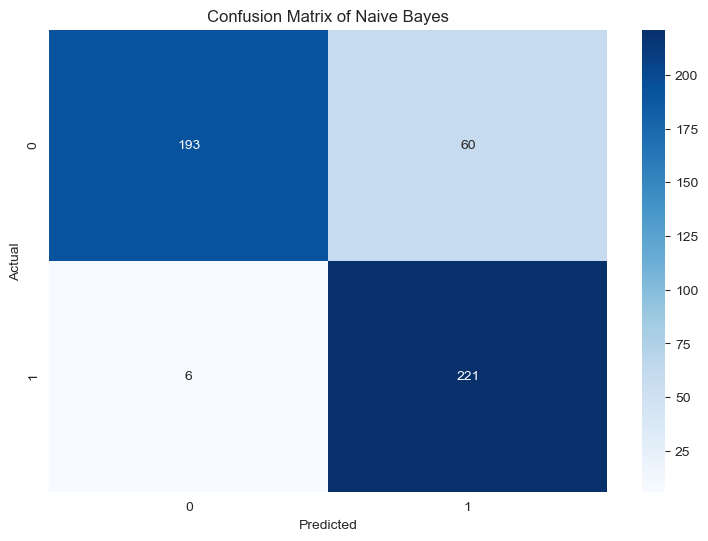

In [13]:
from sklearn.naive_bayes import GaussianNB

def get_NB(Xtrain, ytrain):
    clf = GaussianNB()
    clf.fit(Xtrain, ytrain)
    return clf

NB_clf = get_NB(Xtrain, ytrain)
print('Accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, NB_clf.predict(Xtrain))))
print('Accuracy score (val): {0:.6f}'.format(metrics.accuracy_score(yval, NB_clf.predict(Xval))))

showCM(yval,NB_clf.predict(Xval), 'Confusion Matrix of Naive Bayes')

Accuracy score (train-MinMax): 0.885417
Accuracy score (val-MinMax): 0.852083


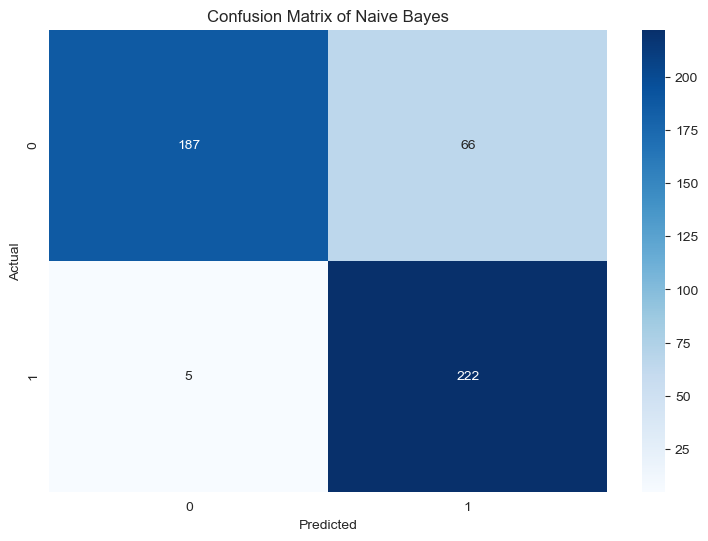

In [14]:
NB_clfmin = get_NB(Xtrain_minscaled, ytrain)
print('Accuracy score (train-MinMax): {0:.6f}'.format(metrics.accuracy_score(ytrain, NB_clfmin.predict(Xtrain_minscaled))))
print('Accuracy score (val-MinMax): {0:.6f}'.format(metrics.accuracy_score(yval, NB_clfmin.predict(Xval_minscaled))))

showCM(yval,NB_clfmin.predict(Xval_minscaled), 'Confusion Matrix of Naive Bayes')

Accuracy score (train-Standard): 0.868750
Accuracy score (val-Standard): 0.845833


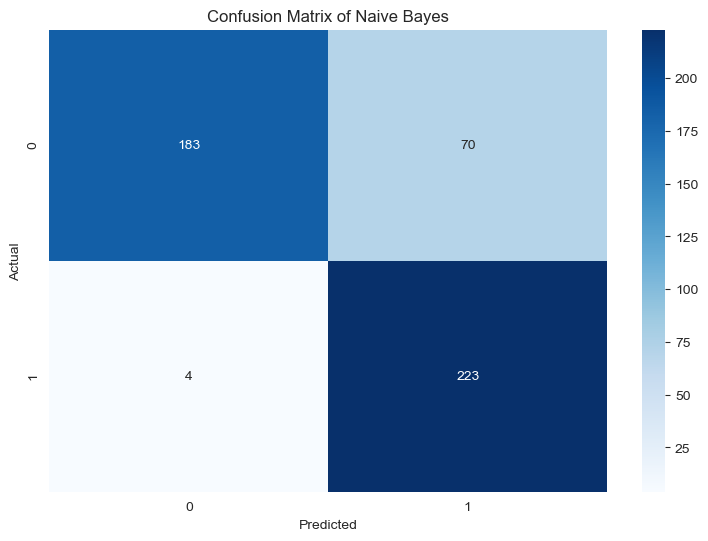

In [15]:
NB_clfstd = get_NB(Xtrain_stanscaled, ytrain)
print('Accuracy score (train-Standard): {0:.6f}'.format(metrics.accuracy_score(ytrain, NB_clfstd.predict(Xtrain_stanscaled))))
print('Accuracy score (val-Standard): {0:.6f}'.format(metrics.accuracy_score(yval, NB_clfstd.predict(Xval_stanscaled))))

showCM(yval,NB_clfstd.predict(Xval_stanscaled), 'Confusion Matrix of Naive Bayes')

Vidíme, že dokonce v tomto případě normalizace výsledky dokonce jemně zhoršila. To může být však způsobeno numerickými nepřesnostnmi, neboť nyní pracuje s menšími čísly. 
Pro tento případ jsme dokonce zkusili standardizaci, která podle očekávání nedopadla dobře.

Z matice záměn můžeme vyčíst, že model naivního Bayese velmi často zaměnil tričko za kalhoty než-li naopak.

### LDA

Podobně jako u naivního Bayese hádáme, že to nemusí být ideální model, neboť předpokládá normalitu příznaků, což data nesplňují.
Vyladíme hyperparametry na zkusíme na normalizovaném i standardizovaném datasetu.

Fitting 5 folds for each of 2 candidates, totalling 10 fits

----------------------------------------------------------------------------------------------------
Best model is LinearDiscriminantAnalysis(solver='lsqr')
Accuracy score (train): 1.000000
Accuracy score (val): 0.916667


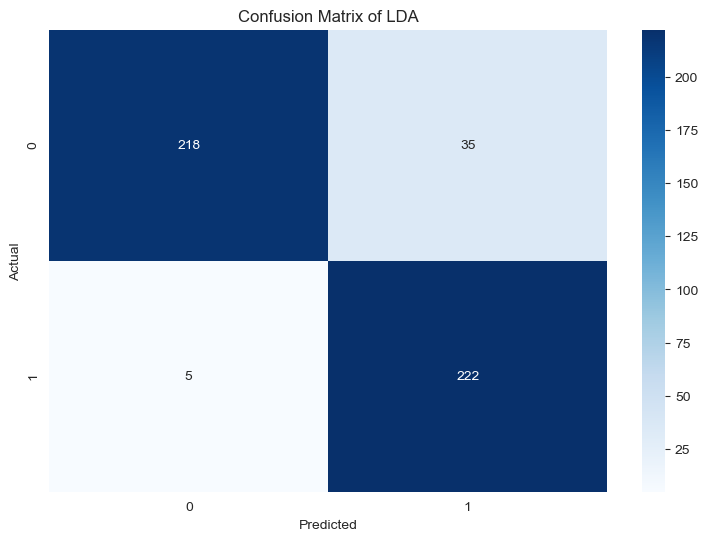

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis(store_covariance = True)
clf.fit(Xtrain, ytrain)

def tune_LDA(Xtrain, ytrain):
    param_grid = {'solver': ['svd', 'lsqr']}
    grid = GridSearchCV(LinearDiscriminantAnalysis(),param_grid, refit=True, verbose=1, cv=5)
    grid.fit(Xtrain,ytrain)
    return grid.best_estimator_
best_LDA = tune_LDA(Xtrain, ytrain)

print('\n' + 100*'-')
print(f'Best model is {best_LDA}')
print('Accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, best_LDA.predict(Xtrain))))
print('Accuracy score (val): {0:.6f}'.format(metrics.accuracy_score(yval, best_LDA.predict(Xval))))

showCM(yval,best_LDA.predict(Xval), 'Confusion Matrix of LDA') 

Fitting 5 folds for each of 2 candidates, totalling 10 fits

----------------------------------------------------------------------------------------------------
Best model of LinearDiscriminantAnalysis(solver='lsqr')
Accuracy score (train-MinMax): 1.000000
Accuracy score (val-MinMax): 0.918750


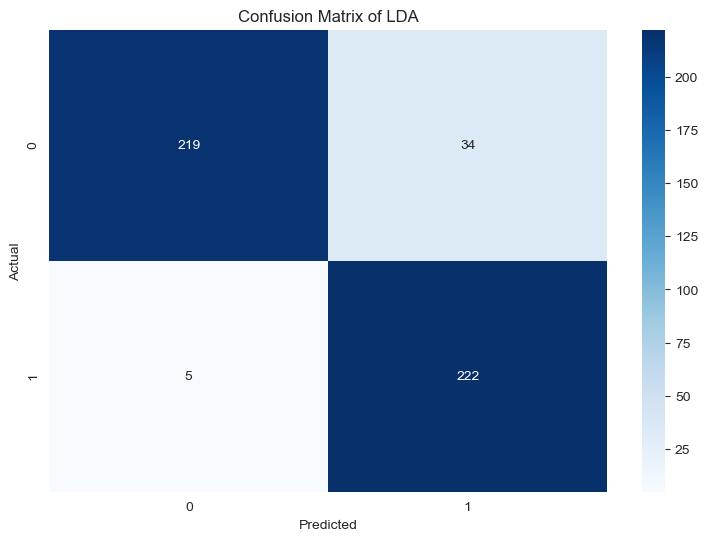

In [17]:
best_LDA_min = tune_LDA(Xtrain_minscaled, ytrain)
print('\n' + 100*'-')
print(f'Best model of {best_LDA_min}')
print('Accuracy score (train-MinMax): {0:.6f}'.format(metrics.accuracy_score(ytrain, best_LDA_min.predict(Xtrain_minscaled))))
print('Accuracy score (val-MinMax): {0:.6f}'.format(metrics.accuracy_score(yval, best_LDA_min.predict(Xval_minscaled))))

showCM(yval,best_LDA_min.predict(Xval_minscaled), 'Confusion Matrix of LDA') 

Fitting 5 folds for each of 2 candidates, totalling 10 fits

----------------------------------------------------------------------------------------------------
Best model of LinearDiscriminantAnalysis(solver='lsqr')
Accuracy score (train-Standard): 1.000000
Accuracy score (val-Standard): 0.918750


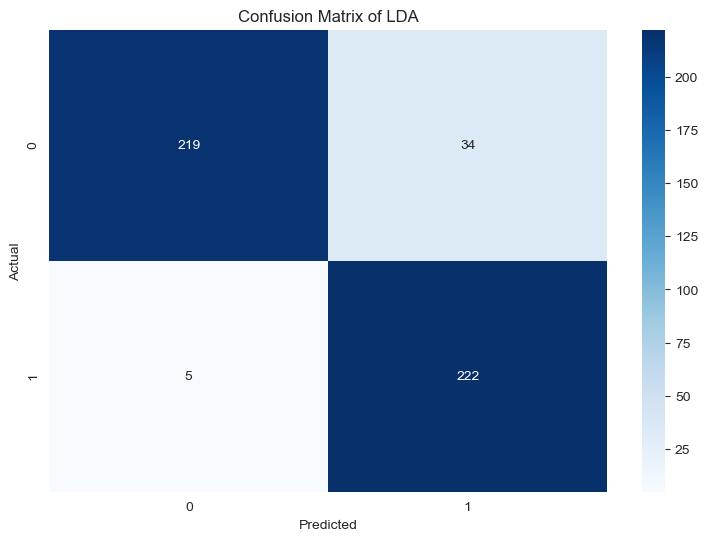

In [18]:
best_LDA_std = tune_LDA(Xtrain_stanscaled, ytrain)
print('\n' + 100*'-')
print(f'Best model of {best_LDA_std}')
print('Accuracy score (train-Standard): {0:.6f}'.format(metrics.accuracy_score(ytrain, best_LDA_std.predict(Xtrain_stanscaled))))
print('Accuracy score (val-Standard): {0:.6f}'.format(metrics.accuracy_score(yval, best_LDA_std.predict(Xval_stanscaled))))

showCM(yval,best_LDA_std.predict(Xval_stanscaled), 'Confusion Matrix of LDA') 

V tomto případě nám vyšlo, že standardizovaná data nám dala nejlepší model, nicméně rozdíly jsou velmi malé a jsou o znatelně horší než náš SVM model.

Opět vidíme spoustu, že modely LDA častěji zaměnil tričko za kalhoty, než-li naopak.

## Redukce dimenzionality

### PCA

Z teorie víme, že PCA je je dobré na již normalizovaných datech.
Podíváme na vizualizaci podílu a kumulativního vysvětlovaného rozptylu na určení rozumného počtu komponent.

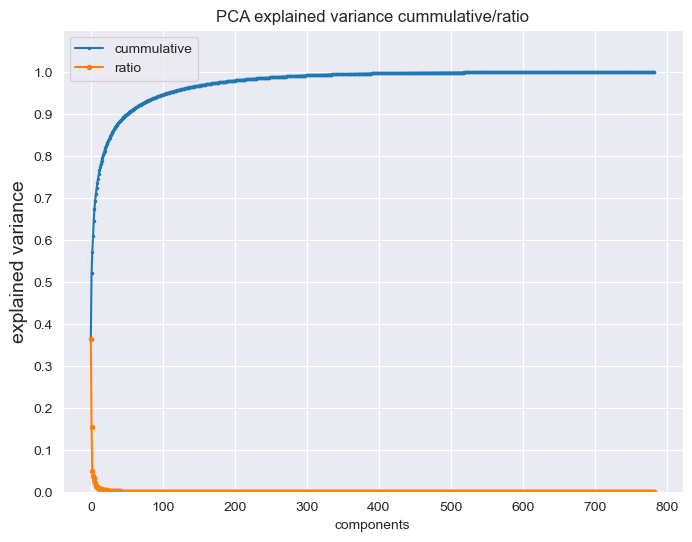

In [19]:
from sklearn.decomposition import PCA


pca = PCA()
pca.fit(Xtrain_minscaled)

# print(pca.explained_variance_ratio_)
fig = plt.subplots(figsize=(8,6))
plt.ylim(0.0,1.1)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', markersize=1.5)
plt.plot(pca.explained_variance_ratio_, marker='o', markersize=3)
plt.xlabel('components')
plt.ylabel('explained variance', fontsize=14)
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.title('PCA explained variance cummulative/ratio')
plt.legend(['cummulative', 'ratio'])
plt.show()


Vzhledem k velkému počtu komponent se pokusíme znovu to samé vykreslit pro omezený počet komponent pro jasnější představu.
Nicméně si můžeme všimnout, že již na cca 50 komponentách dosahujeme 90% celkové vysvětlované variance, z čehož můžeme usoudit, že PCA by mohlo být na tento dataset velmi účinné. Zároveň na cca 100 komponentách vidíme, že dosahujeme dokonce i 95%.

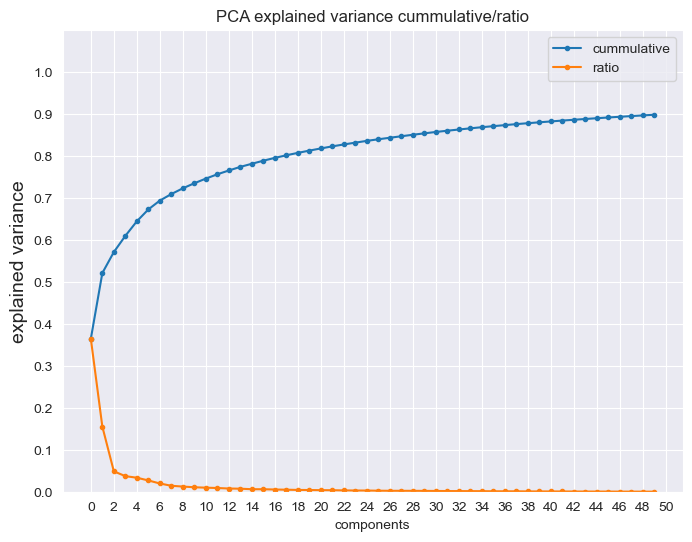

In [20]:
pca = PCA()
pca.fit(Xtrain_minscaled)

# print(pca.explained_variance_ratio_)
fig = plt.subplots(figsize=(8,6))
plt.ylim(0.0,1.1)
plt.plot(np.cumsum(pca.explained_variance_ratio_)[0:50], marker='o', markersize=3)
plt.plot(pca.explained_variance_ratio_[0:50], marker='o', markersize=3)
plt.xlabel('components')
plt.ylabel('explained variance', fontsize=14)
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, 52, step=2))
plt.title('PCA explained variance cummulative/ratio')
plt.legend(['cummulative', 'ratio'])
plt.show()


Vidíme, že na 2 komponentách je v grafu tzv. "elbow", což bývá dobrý limit na počet komponent. Nicméně první 2 komponenty vysvětlují pouze necelých 60% vysvětlovaného rozptylu. 
Mohlo by však být zajímavé otestovat přesnost na tomto velmi zjednodušeném modelu se 2 komponentami, a proto si tranformovaný dataset se 2 komponentami uložíme jako experiment.

In [21]:
pca_2cmp = PCA(n_components=2)
pca_2cmp.fit(Xtrain_minscaled)
Ttrain_2cmp = pca_2cmp.transform(Xtrain_minscaled)
Tval_2cmp = pca_2cmp.transform(Xval_minscaled)
Ttest_2cmp = pca_2cmp.transform(Xtest_minscaled)

pca = PCA()
pca.fit(Xtrain_minscaled)
Ttrain = pca.transform(Xtrain_minscaled)
Tval = pca.transform(Xval_minscaled)
Ttest = pca.transform(Xtest_minscaled)

Pokusme se nyní pracovat s transformovanými daty.

In [22]:
def tune_with_Acc(model_tuner, Ttrain, ytrain, Tval, yval, txt=''):
    best_model = model_tuner(Ttrain, ytrain)
    print('\n' + 100*'-')
    print(f'Best model is {best_model}')
    print(txt+'Accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, best_model.predict(Ttrain))))
    print(txt+'Accuracy score (val): {0:.6f}'.format(metrics.accuracy_score(yval, best_model.predict(Tval))))
    return best_model

Začněme opět analýzou transformovaných dat na modelu SVM.

In [23]:
best_SVC_2cmp = tune_SVC(Ttrain_2cmp,ytrain,True)

print('\n' + 100*'-')
print(f'Best model is {best_SVC_2cmp}')
print('Accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, best_SVC_2cmp.predict(Ttrain_2cmp))))
print('Accuracy score (val): {0:.6f}'.format(metrics.accuracy_score(yval, best_SVC_2cmp.predict(Tval_2cmp))))



Fitting 4 folds for each of 18 candidates, totalling 72 fits

----------------------------------------------------------------------------------------------------
Best model is SVC(C=0.1, gamma=0.01, probability=True)
Accuracy score (train): 0.952778
Accuracy score (val): 0.947917


Vidíme, že i v takto zjednodušeném modelu dává SVM klasifikátor velmi dobré výsledky.

Při práci s v 2D modelu by mohlo být zajímavé si zobrazit rozhodovací hranici.

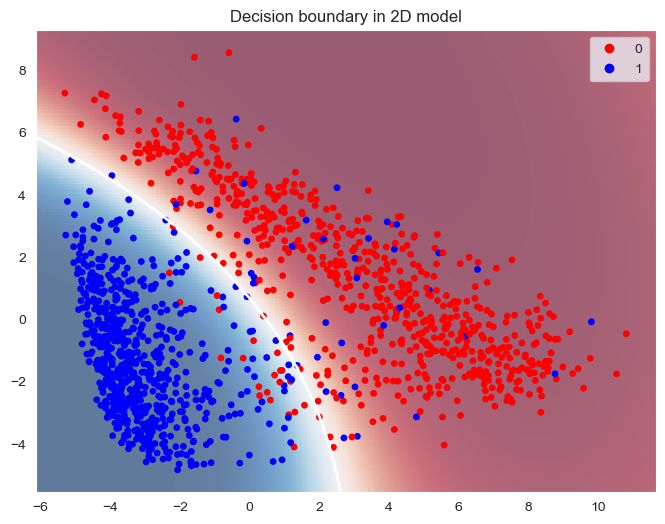

In [24]:
from matplotlib.colors import ListedColormap

# Inspired by BI-ML2 5th notebook.
def decision_boundary(clf, Ttrain):
    fig, ax = plt.subplots(figsize=(8,6))
    plt.title('Decision boundary in 2D model')
    colours = ListedColormap(['r','b'])
    sc = ax.scatter(Ttrain[:,0], Ttrain[:,1], c=ytrain, cmap=colours, s = 15)
    ax.legend(*sc.legend_elements())

    nx, ny = 250, 150
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 0].reshape(xx.shape)
    ax.grid(False)
    ax.pcolormesh(
    xx, yy, Z, cmap = 'RdBu_r', alpha = 0.6, zorder=0
    )
    ax.contour(xx, yy, Z, [0.5], linewidths=2.0, colors="white")

    plt.show()
decision_boundary(best_SVC_2cmp, Ttrain_2cmp)

Z vizualizace je patrné, že i 2D model je velmi dobrý. Je zajímavé, že v této vizualizaci je třída 1 z většiny velmi kompaktní, ale na druhou stranu je nemalé množství špatně klasifikovaných bodů velmi daleko od rozhodovací hranice.

Pokusme se nyní najít optimální počet komponent pro SVM. Vzhledem ke vskutku velké dimenzi bude příliš výpočetně náročné to dělat pro všechny počty komponent a tedy budeme postupně zkoušet méně a méně hodnost komponent se vzrůstajícím počtem.

In [25]:
from logging import handlers


def optimize_components(model_tuner, Ttrain, ytrain, Tval, yval, title):
    components = np.concatenate([np.arange(1, 10, 1), np.arange(10,100,5), np.arange(100, 300, 20), np.arange(300, 784, 100)])
    val_acc = []
    best = None
    best_acc = 0
    for n in components:
        Ttrain_reduced = Ttrain[:,0:n]
        Tval_reduced = Tval[:,0:n]
        best_model = model_tuner(Ttrain_reduced,ytrain)
        acc = metrics.accuracy_score(yval, best_model.predict(Tval_reduced))
        if(best is None or acc > best_acc):
            best = best_model 
            best_acc = acc
        val_acc.append(acc)
        
    fig, ax = plt.subplots(figsize=(8,6))
    fig.suptitle(title)
    ax.plot(components, val_acc, color='blue', linewidth=1, marker='o', markersize=3)
    ax.legend(ax.get_legend_handles_labels(), labels = ['validation acc'])
    ax.set_xlabel('Number of components')
    ax.set_ylabel('Validation accuracy')

    plt.show()
    
    print(f'Best accuracy is {np.max(val_acc)} with {components[np.argmax(val_acc)]} components.')

    return best


Fitting 4 folds for each of 18 candidates, totalling 72 fits
Fitting 4 folds for each of 18 candidates, totalling 72 fits
Fitting 4 folds for each of 18 candidates, totalling 72 fits
Fitting 4 folds for each of 18 candidates, totalling 72 fits
Fitting 4 folds for each of 18 candidates, totalling 72 fits
Fitting 4 folds for each of 18 candidates, totalling 72 fits
Fitting 4 folds for each of 18 candidates, totalling 72 fits
Fitting 4 folds for each of 18 candidates, totalling 72 fits
Fitting 4 folds for each of 18 candidates, totalling 72 fits
Fitting 4 folds for each of 18 candidates, totalling 72 fits
Fitting 4 folds for each of 18 candidates, totalling 72 fits
Fitting 4 folds for each of 18 candidates, totalling 72 fits
Fitting 4 folds for each of 18 candidates, totalling 72 fits
Fitting 4 folds for each of 18 candidates, totalling 72 fits
Fitting 4 folds for each of 18 candidates, totalling 72 fits
Fitting 4 folds for each of 18 candidates, totalling 72 fits
Fitting 4 folds for each

/var/folders/tl/h1jkjn_97773_b51y3fb7cfw0000gn/T/ipykernel_16302/2628339009.py:22: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(ax.get_legend_handles_labels(), labels = ['validation acc'])


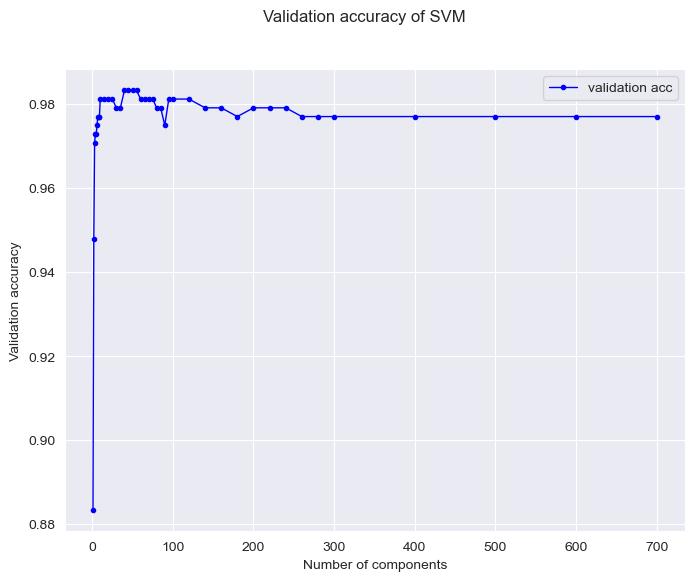

Best accuracy is 0.9833333333333333 with 40 components.


In [26]:
best_SVC_PCA = optimize_components(tune_SVC, Ttrain, ytrain, Tval, yval, 'Validation accuracy of SVM')

Oproti netransformovaným datům dosahujeme nyní o něco lepších výsledků na modelu SVM.

Podívejme se rychle na model Naivního bayese.

In [27]:
NB_2cmp = tune_with_Acc(get_NB, Ttrain_2cmp, ytrain, Tval_2cmp, yval)



----------------------------------------------------------------------------------------------------
Best model is GaussianNB()
Accuracy score (train): 0.953472
Accuracy score (val): 0.943750


Vidíme, že i v tak zjednodušeném modelu jsme získali pro Naivního Bayese lepší výsledky než jsme měli v netransformovaných datech.

Pro zajímavost se podívejme na rozhodovací hranici.

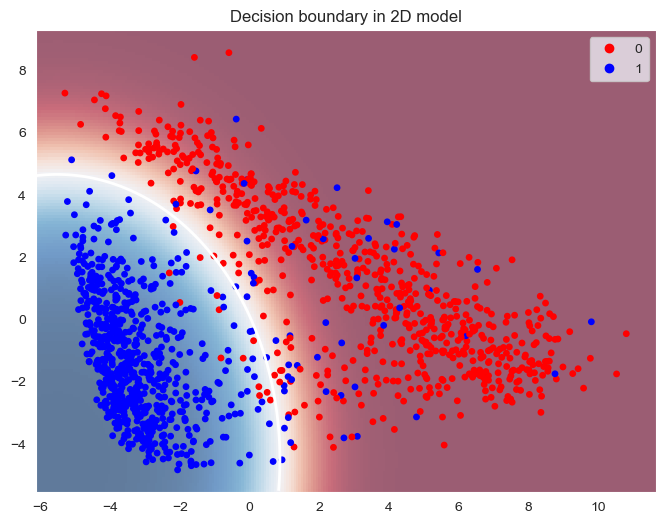

In [28]:
decision_boundary(NB_2cmp, Ttrain_2cmp)

Vidíme, že je podobná jako v modelu SVM.

/var/folders/tl/h1jkjn_97773_b51y3fb7cfw0000gn/T/ipykernel_16302/2628339009.py:22: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(ax.get_legend_handles_labels(), labels = ['validation acc'])


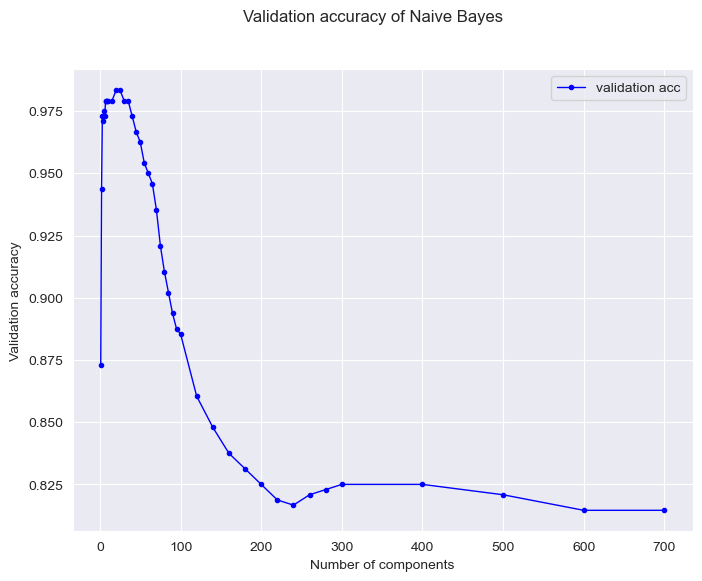

Best accuracy is 0.9833333333333333 with 20 components.


In [29]:

best_NB_PCA = optimize_components(get_NB, Ttrain, ytrain, Tval, yval, 'Validation accuracy of Naive Bayes')


Je zjevné, že model naivního Bayese preferuje nižší dimenzi, neboť s vyšší dimenzí nám v tomhle případě dost rapidně klesala přesnost. Dokonce je nejlepší přesnost rovná nejlepší přesnosti SVM a to s polovičním počtem komponent.

Podívejme se nakonec na vliv PCA na model LDA.

Fitting 5 folds for each of 2 candidates, totalling 10 fits

----------------------------------------------------------------------------------------------------
Best model is LinearDiscriminantAnalysis()
Accuracy score (train): 0.952083
Accuracy score (val): 0.945833


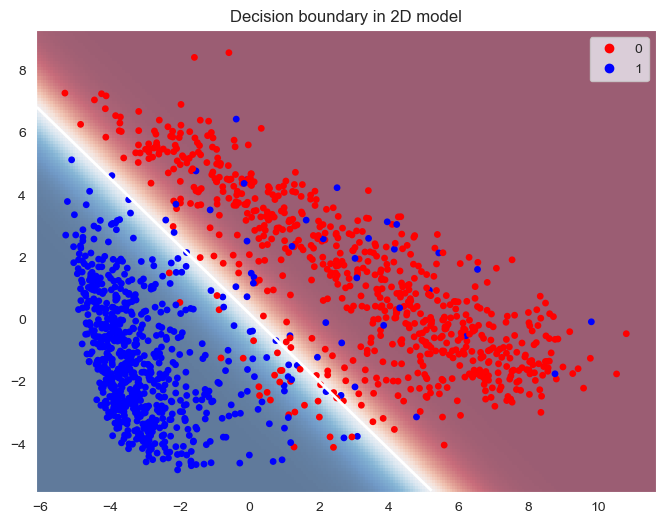

In [30]:
best_LDA_2cmp = tune_with_Acc(tune_LDA, Ttrain_2cmp, ytrain, Tval_2cmp, yval)
decision_boundary(best_LDA_2cmp, Ttrain_2cmp)

I v tomto případě jsme velmi vylepšili původní model, což je zajímavé.
Vidíme, že rozhodovací hranice je přímka, narozdíl od předchozích modelů.

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates

/var/folders/tl/h1jkjn_97773_b51y3fb7cfw0000gn/T/ipykernel_16302/2628339009.py:22: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(ax.get_legend_handles_labels(), labels = ['validation acc'])


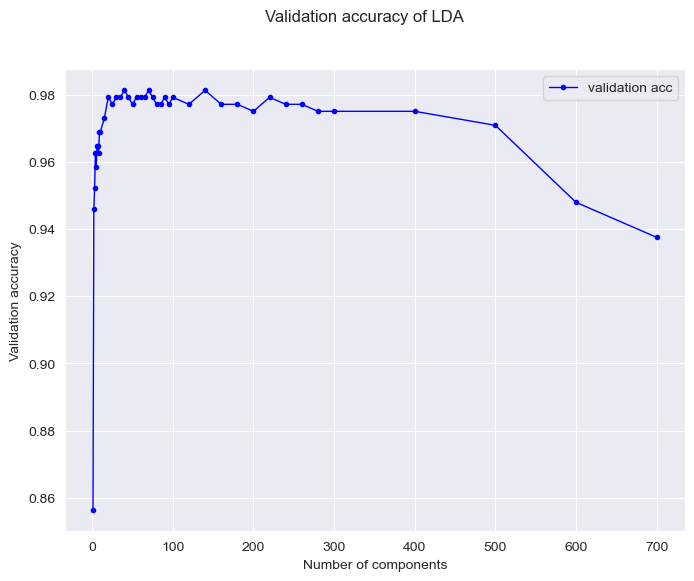

Best accuracy is 0.98125 with 40 components.


In [31]:

best_LDA_PCA = optimize_components(tune_LDA, Ttrain, ytrain, Tval, yval, 'Validation accuracy of LDA')


Opět vidíme velmi pěknou přesnost, nicméně se nevyrovná modelu naivního Bayese ani SVM.

### LLE

In [46]:
from sklearn.manifold import LocallyLinearEmbedding

Konzistentně zopakujeme kroky z PCA a výsledky porovnáme.

Fitting 4 folds for each of 18 candidates, totalling 72 fits

----------------------------------------------------------------------------------------------------
Best model is SVC(C=1, gamma=0.01, kernel='linear', probability=True)
Accuracy score (train): 0.983333
Accuracy score (val): 0.977083


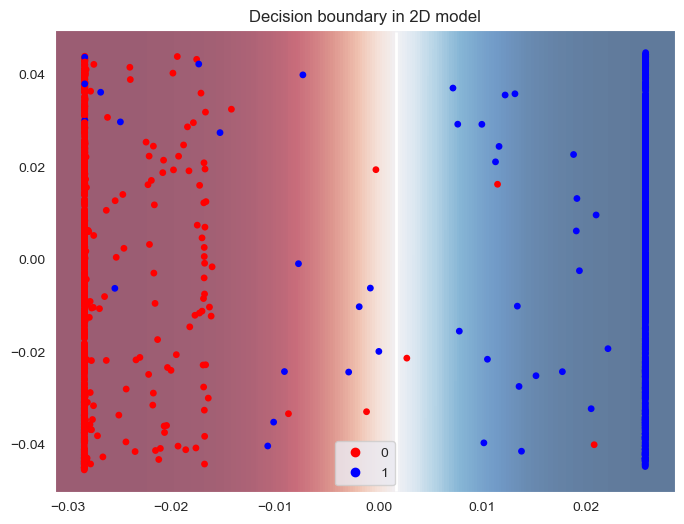

In [51]:
lle = LocallyLinearEmbedding(n_components=2)
lle.fit(Xtrain_minscaled)
Ttrain_2lle = lle.transform(Xtrain_minscaled)
Tval_2lle = lle.transform(Xval_minscaled)

best_SVC_2lle = tune_SVC(Ttrain_2lle,ytrain,True)
print('\n' + 100*'-')
print(f'Best model is {best_SVC_2lle}')
print('Accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, best_SVC_2lle.predict(Ttrain_2lle))))
print('Accuracy score (val): {0:.6f}'.format(metrics.accuracy_score(yval, best_SVC_2lle.predict(Tval_2lle))))

decision_boundary(best_SVC_2lle, Ttrain_2lle)

Vidíme velmi zajímavé výsledky, už na 2 komponentách dosahuje tento model s LLE transformací velmi zajímavých výsledků. 
Pro zajímavost jsme si vykreslili i rozhodovací hranici a vypadá velmi kompaktně. Obě dvě třídy zobrazil na téměř úsečky.

In [34]:
def optimize_components_LLE(model_tuner, Xtrain, ytrain, Xval, yval, title):
    components = np.concatenate([np.arange(1, 10, 1), np.arange(10,100,5), np.arange(100, 300, 20), np.arange(300, 784, 100)])
    val_acc = []
    best = None
    best_acc = 0
    for n in components:
        lle_ = LocallyLinearEmbedding(n_components = n)
        Ttrain_lle = lle_.fit_transform(Xtrain)
        Tval_lle = lle_.transform(Xval)
        best_model = model_tuner(Ttrain_lle,ytrain)
        acc = metrics.accuracy_score(yval, best_model.predict(Tval_lle))
        if(best is None or acc > best_acc):
            best = best_model 
            best_acc = acc
        val_acc.append(acc)
        
    fig, ax = plt.subplots(figsize=(8,6))
    fig.suptitle(title)
    ax.plot(components, val_acc, color='blue', linewidth=1, marker='o', markersize=3)
    ax.legend(ax.get_legend_handles_labels(), labels = ['validation acc', ])
    ax.set_xlabel('Number of components')
    ax.set_ylabel('Validation accuracy')

    plt.show()
    print(f'Best accuracy is {np.max(val_acc)} with {components[np.argmax(val_acc)]} components.')
    return best


Fitting 4 folds for each of 18 candidates, totalling 72 fits
Fitting 4 folds for each of 18 candidates, totalling 72 fits
Fitting 4 folds for each of 18 candidates, totalling 72 fits
Fitting 4 folds for each of 18 candidates, totalling 72 fits
Fitting 4 folds for each of 18 candidates, totalling 72 fits
Fitting 4 folds for each of 18 candidates, totalling 72 fits
Fitting 4 folds for each of 18 candidates, totalling 72 fits
Fitting 4 folds for each of 18 candidates, totalling 72 fits
Fitting 4 folds for each of 18 candidates, totalling 72 fits
Fitting 4 folds for each of 18 candidates, totalling 72 fits
Fitting 4 folds for each of 18 candidates, totalling 72 fits
Fitting 4 folds for each of 18 candidates, totalling 72 fits
Fitting 4 folds for each of 18 candidates, totalling 72 fits
Fitting 4 folds for each of 18 candidates, totalling 72 fits
Fitting 4 folds for each of 18 candidates, totalling 72 fits
Fitting 4 folds for each of 18 candidates, totalling 72 fits
Fitting 4 folds for each

/var/folders/tl/h1jkjn_97773_b51y3fb7cfw0000gn/T/ipykernel_16302/1885521778.py:20: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(ax.get_legend_handles_labels(), labels = ['validation acc', ])


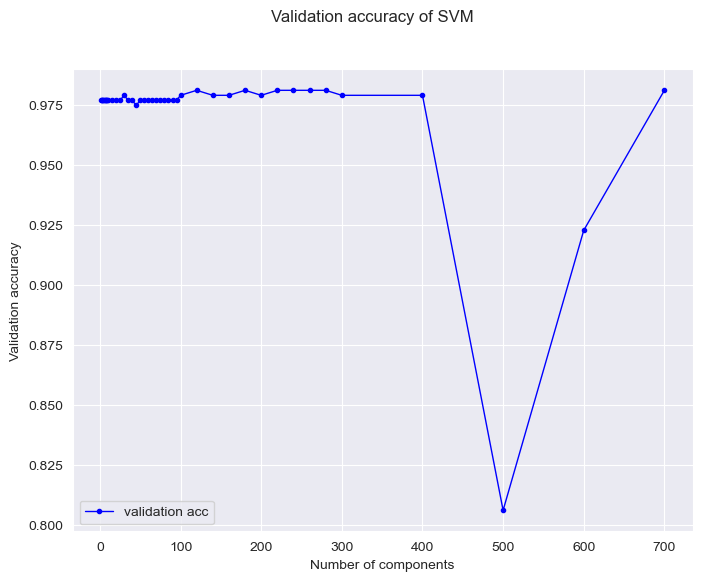

Best accuracy is 0.98125 with 120 components.


In [35]:
best_SVC_LLE = optimize_components_LLE(tune_SVC, Xtrain_minscaled, ytrain, Xval_minscaled, yval, 'Validation accuracy of SVM')

Model se zdá býti velmi konzistentní nehledě na počtu komponent. Jednotlivé výchylky nejspíš znamenají, že model správně určil o jeden, popř. o dva obrázky více. Vidíme však několik výjimek na velkém počtu komponent, které jsou nejspíš způsobeny numerickými potížemi.

Zopakujme totéž nyní pro naivního Bayese.


----------------------------------------------------------------------------------------------------
Best model is GaussianNB()
Accuracy score (train): 0.984028
Accuracy score (val): 0.979167


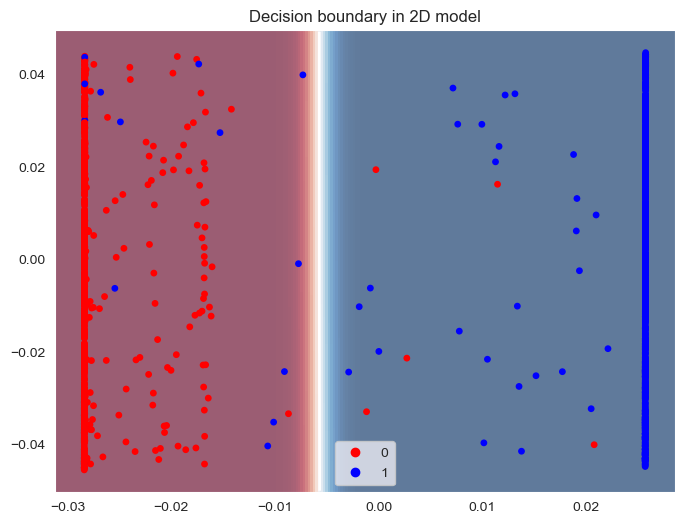

In [52]:
best_NB_2lle = get_NB(Ttrain_2lle,ytrain)
print('\n' + 100*'-')
print(f'Best model is {best_NB_2lle}')
print('Accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, best_NB_2lle.predict(Ttrain_2lle))))
print('Accuracy score (val): {0:.6f}'.format(metrics.accuracy_score(yval, best_NB_2lle.predict(Tval_2lle))))

decision_boundary(best_NB_2lle, Ttrain_2lle)

/var/folders/tl/h1jkjn_97773_b51y3fb7cfw0000gn/T/ipykernel_16302/1885521778.py:20: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(ax.get_legend_handles_labels(), labels = ['validation acc', ])


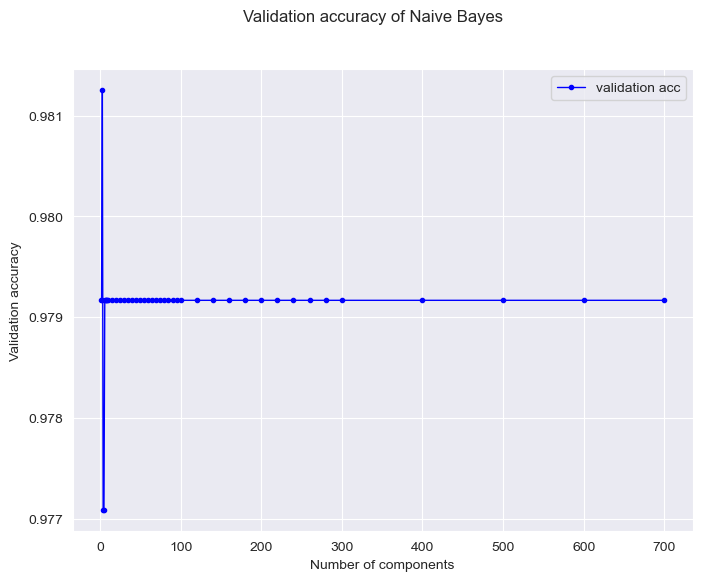

Best accuracy is 0.98125 with 3 components.


In [37]:
best_NB_LLE = optimize_components_LLE(get_NB, Xtrain_minscaled, ytrain, Xval_minscaled, yval, 'Validation accuracy of Naive Bayes')

Zde už vidíme podobný fenomén jako v předchozím případě, že model funguje velmi dobře už na malém počtu komponent.

A nakonec ještě LDA

Fitting 5 folds for each of 2 candidates, totalling 10 fits

----------------------------------------------------------------------------------------------------
Best model is LinearDiscriminantAnalysis()
Accuracy score (train): 0.983333
Accuracy score (val): 0.977083


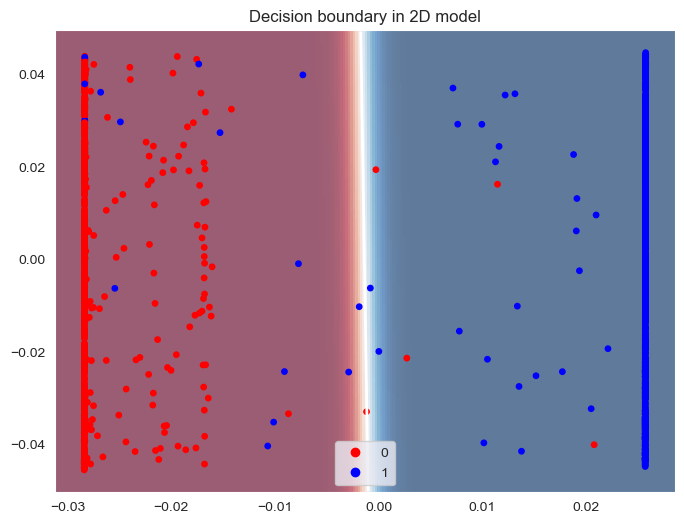

In [53]:
best_LDA_2lle = tune_LDA(Ttrain_2lle,ytrain)
print('\n' + 100*'-')
print(f'Best model is {best_LDA_2lle}')
print('Accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, best_LDA_2lle.predict(Ttrain_2lle))))
print('Accuracy score (val): {0:.6f}'.format(metrics.accuracy_score(yval, best_LDA_2lle.predict(Tval_2lle))))

decision_boundary(best_LDA_2lle, Ttrain_2lle)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates

/var/folders/tl/h1jkjn_97773_b51y3fb7cfw0000gn/T/ipykernel_16302/1885521778.py:20: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(ax.get_legend_handles_labels(), labels = ['validation acc', ])


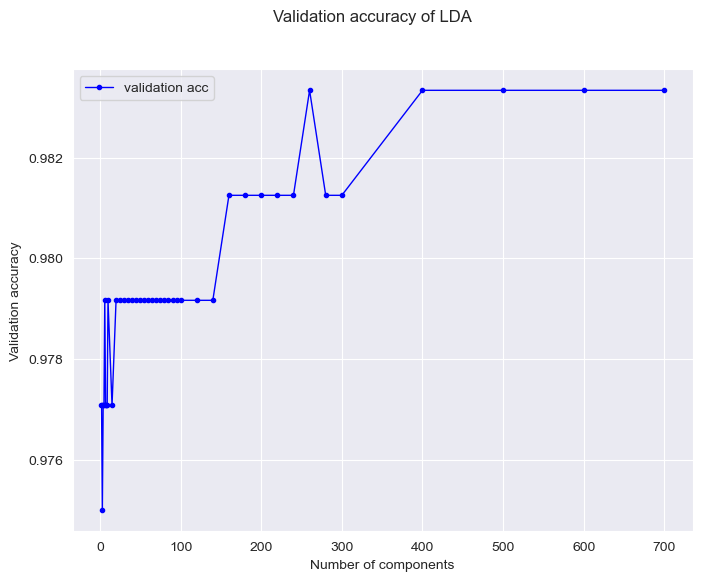

Best accuracy is 0.9833333333333333 with 260 components.


In [39]:
best_LDA_LLE = optimize_components_LLE(tune_LDA, Xtrain_minscaled, ytrain, Xval_minscaled, yval, 'Validation accuracy of LDA')

Vidíme, že tento model dosahuje stejné přesnosti jako naše 3 nejlepší modely.

## Vyhodnocení

Nejlepší validační přesnost měly 3 případy. 
1. SVM se standardizovanými daty.
2. SVM s PCA
3. Naivní Bayes s PCA
4. LDA s LLE

Nicméně vybereme model Naivního Bayese, který měl po transformaci nejméně komponent a my preferujeme jednodušší modely.

In [40]:
Ttest_reduced = Ttest[:,0:best_NB_PCA.n_features_in_]
accuracy = metrics.accuracy_score(ytest, best_NB_PCA.predict(Ttest_reduced))
print('Final Accuracy score (test): {0:.6f}'.format(accuracy))

Final Accuracy score (test): 0.993750


Takovouto přesnost bychom mohli očekávat na nových datech. Nejspíše je lehce nadhodnocená, neboť je přesnost znatelně vyšší než na validační množině.

Nyní už jen uložíme finální predikce.

In [41]:
eval = pd.read_csv('evaluate.csv')
ID = pd.DataFrame(eval['ID'])
eval.drop(columns='ID', inplace=True)
eval = pd.DataFrame(min_scaler.transform(eval), columns=eval.columns)
pca_ = PCA(n_components=best_NB_PCA.n_features_in_).fit(Xtrain_minscaled)
Teval = pca_.transform(eval)
prediction = best_NB_PCA.predict(Teval)

prediction = pd.DataFrame(prediction, columns=['label'])
results = pd.concat([ID, prediction], axis = 1)
results.to_csv('results.csv', index = False)